Note: Unfortunately the data is confidential and cannot be published whereas analysis techniques and plots are shown below.

The following code generates superimposed subplots of Power & Efficiency curves from multivariate CSVs containing parametric variation of metrics.
This analysis and data corresponds to the following **parametric variations** :  
- f_s_nat: 25 kHz, 85 kHz & 200 kHz
- Frequency: f_s_nat +- 10%  (actual switching frequency)
- R_load: 10, 75 & 100 ohm
- k: 0.2, 0.5 & 0.9


Charts are for PE operator curves where operator is + and * and + has a factor that is varied from 0 to 1.
- P+E and P*E curves
- PE with 0.8 weight curves (vs Freq, vs Factor)
- PE @ 85kHz with weight 0.1 to 1 curves (vs Freq)
- V vs Freq curve
- I vs Freq curve
- PE vs Power curves


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the Excel file
filePaths = [
    '/content/drive/MyDrive/..x.csv'
    ]



Plots **vs Frequency**
The following plots are for each Factor, R_load per plot across k values.
The following plots are shown:

*   Efficiency vs Frequency
*   Power vs Frequency  

**NOTE**
Skip the below cell and execute from the cell after below to generated (Efficiency+Power) vs Frequency plot which is a weighted function of Efficiency + Power. It represents best value (depending on weight) of how you prioritise Power & Efficiency for a target Load & k value. Normally for a switching rate that's either equal to or slightly higher than resonant frequency of 2ndary tank circuit, either Efficiency is MAX or Power is MAX, not both at the same value of switching frequency. So giving a weightage value to Power vs Efficiency will maximise the weighted function of :
wt_power * Power(f) + (1-wt_power) * Efficiency(f)

The following plots 2 graphs -
Power * Efficiency
Power + Efficiency

These are NOT weighted but simply product & sum plots. For weighted see the code block after below block.


WEIGHTED **(Power+Efficiency) vs Frequency**  
Here a constant weight factor (0.8) is chosen and Power, Efficiency are balanced by the weight factor. In the next code cell this weight factor is varied in steps unlike in this cell where it is constant.


Plots **vs Factor**
The following plots are for each Frequency, R_load per plot across k values.
The following plots are shown:

*   Efficiency vs Factor
*   Power vs Factor

**NOTE**
The previous code block above must be executed PRIOR to running the below code block.

**PE vs Factor for range of weights (0 to 1)**

#########################################################  

**Voltage and Current graphs** by Frequency and weights  

#########################################################  


In this scenario a fixed f_s_nat is set (85kHz) through the simulation.  
Switching frequency is varied about the 2ndary natural frequency (f_s_nat) like a tuner. Output Efficiency, Power, Voltage & Current is recorded based on actual switching frequency that hovers +- w.r.t 85kHz.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty list to store the final origin locations
origins = []

def distance(p1, p2):
    #return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return abs(p2[1] - p1[1])

def calc_final_origin(origin, min_offset):
  global origins
  # Check if the origin is too close to any of the previous origins
  # Presort the origins list by Y coordinate to avoid rechecking previous clashes if current origin Y must be incremented
  for prev_origin in origins:
    # Calculate the distance between the origin and the previous origin
    dist = distance(origin, prev_origin)
    # If the distance is less than the minimum offset value
    if dist < min_offset:
      # increment only Y coordinate[1] of origin
      #y = (prev_origin[1]+origin[1])/2 + min_offset
      y = prev_origin[1] + min_offset
      #print(f'clash: B4=>{origin[1]}-{prev_origin[1]}. AF=>{y}-{prev_origin[1]}')
      origin = (origin[0], y)

  origins.append(origin)
  origins = sorted(origins, key=lambda t: t[1])
  #print(origins)
  return origin


Plot vanilla **Efficiency, Power, Voltage & Current curves** vs Frequency along X axis.

In [ ]:
#######################################################
# file path is common across the following scenarios
# This CELL MUST be RUN prior to running the below cells
#######################################################
filePaths = [
    '/content/drive/MyDrive/data/Half Bridge LC pulser5V3 -aiding-k-Tesla-parametric-2ndary_tank_size-variance-tuner2-85k-f_k-V_I.xlsx'

]


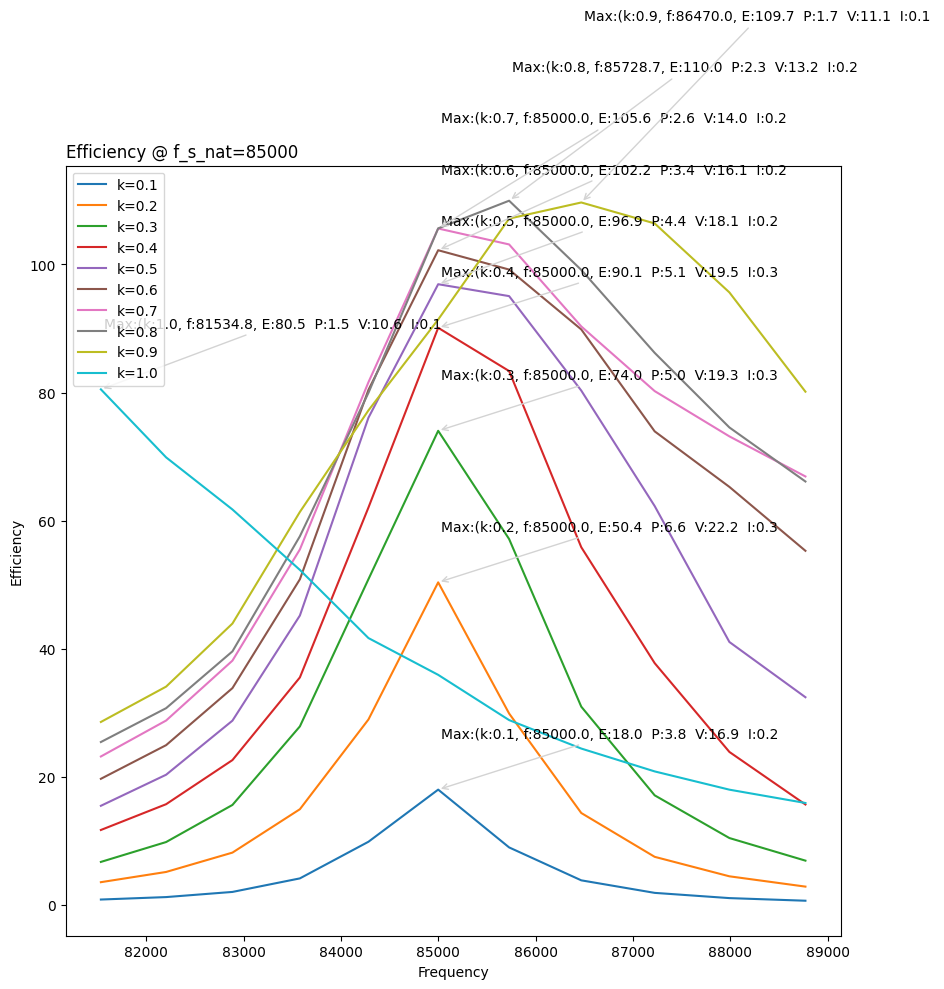

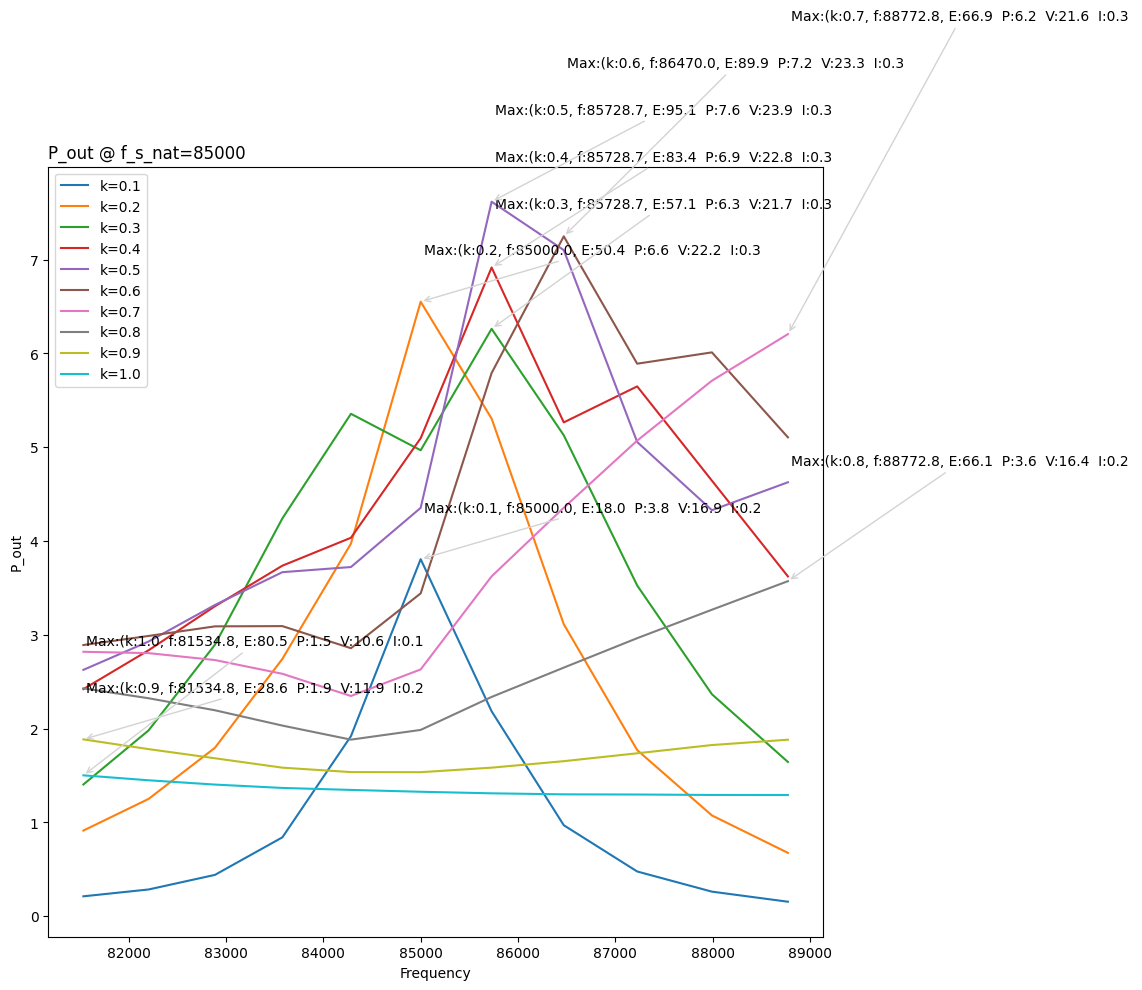

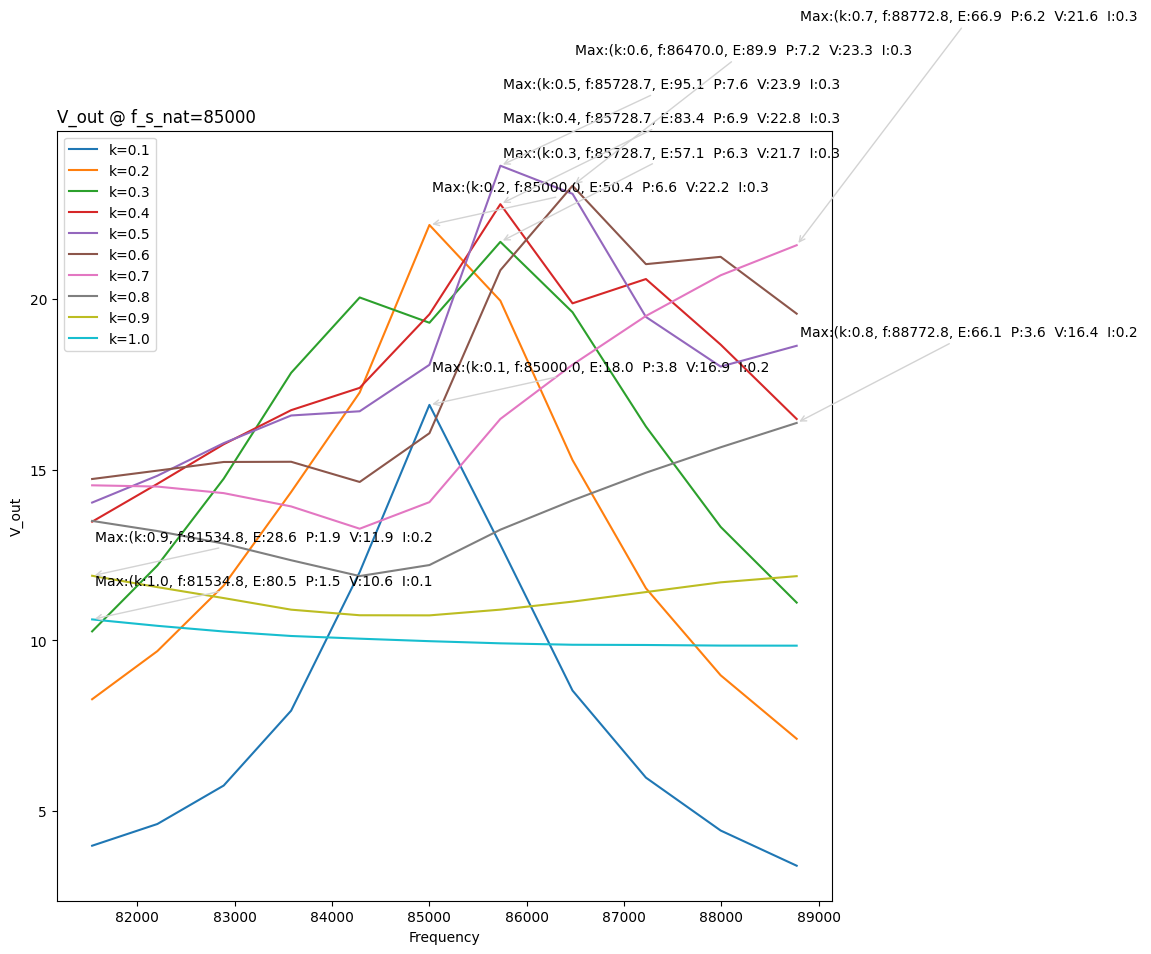

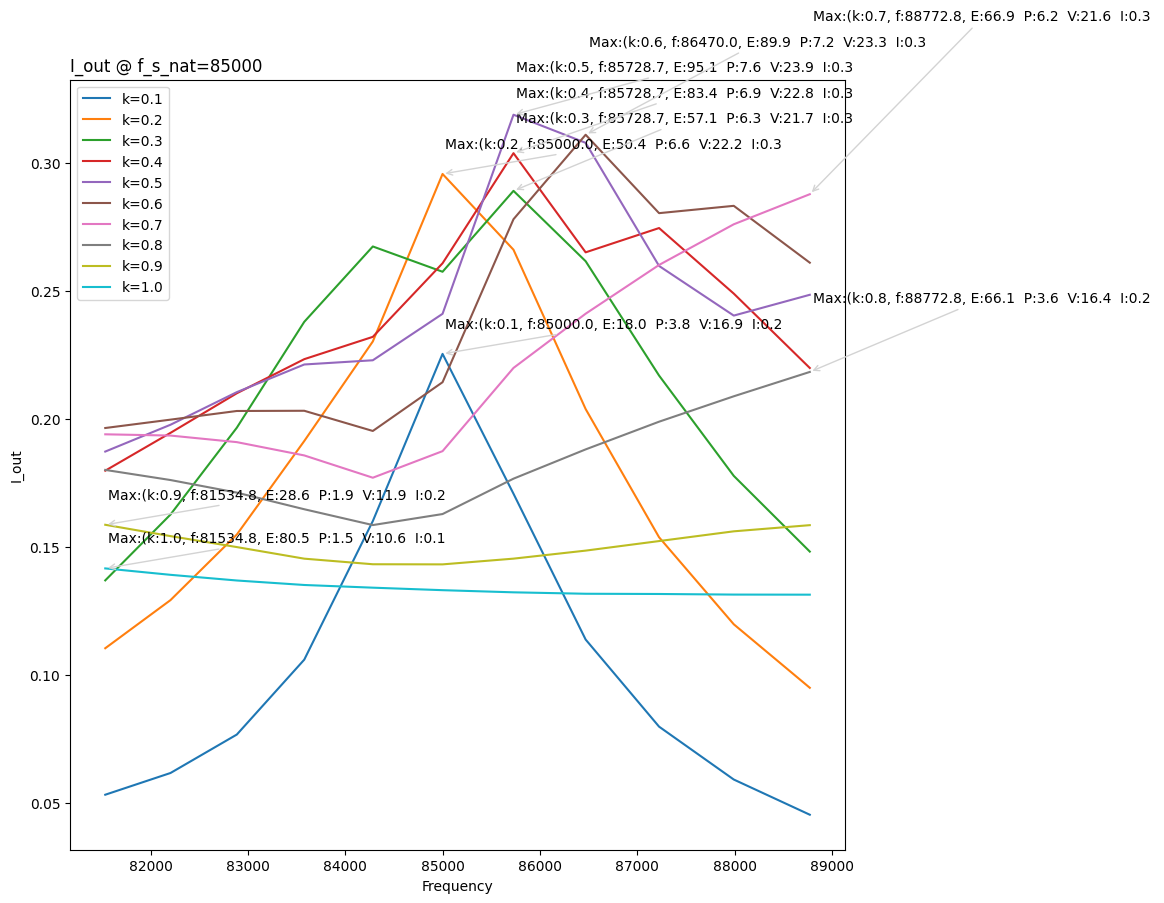

In [ ]:
# Column names and offsets are specific to the plots below ONLY
column_names = ['Efficiency', 'P_out', 'V_out', 'I_out']
min_offsets = {
    'PE_sum': 10,
    'Efficiency': 8,
    'P_out': 0.5,
    'V_out': 1,
    'I_out': 0.01
}

# function
def plot_Column(df, f, k, column_name):
  # column_name for example is 'Efficiency'
  df_kf = df.sort_values(by='Frequency')
  maxY = df_kf[column_name].max()
  maxId = df_kf[column_name].idxmax()
  maxFrequency = df_kf['Frequency'][maxId]
  max_state = ''
  for col2 in column_names:
    max_state += f' {col2[0]}:{df_kf[col2][maxId]:.1f} '

  min_offset = min_offsets[column_name]
  textOrigin = (maxFrequency+30, maxY+min_offset)
  textOrigin = calc_final_origin(textOrigin, min_offset)  # to avoid text label overlaps
  #print(f'maxY: {maxY}, textOrigin:{textOrigin[1]}')

  axs.plot(df_kf['Frequency'], df_kf[column_name], label=f'k={k}')
  axs.set_title(f'{column_name} @ f_s_nat={f}', loc='left')
  axs.legend()

  # Set X and Y axis titles
  axs.set_xlabel('Frequency')
  axs.set_ylabel(column_name)
  axs.annotate(f"Max:(k:{k}, f:{maxFrequency:.1f}," + max_state,
              xy=(maxFrequency,maxY), xytext=textOrigin,
              textcoords="data",
              arrowprops=dict(arrowstyle="->", color='lightgray'))

  # end function

# Loop over all files
for filePath in filePaths:
  # Read the Excel file
  df = pd.read_excel(filePath, sheet_name='EfficiencyConfigurations')

  #column_names = ['I_out']
  f = 85000
  k_values = np.sort(df['k'].unique())
  for i, column_name in enumerate(column_names):
    origins = []
    fig, axs = plt.subplots(1,1,figsize=(10, 10))
    for k in k_values:
      df_k = df[df['k'] == k]
      plot_Column(df_k, f, k, column_names[i])
      # Adjust the vertical spacing between the rows
      plt.subplots_adjust(hspace=0.75)






Plot **WEIGHTED PE function vs Frequency**.
An Objective function is defined for (Power + Efficiency) which in this example is a linear combination of Power & Efficiency. Weight factor is varied from 0 to 1.


Plot Power vs Efficiency




#  
#  
#  

#  

#  


Plot **Voltage vs Frequency** for each Power weightage

In [ ]:
########################################################
# Current may vary
########################################################

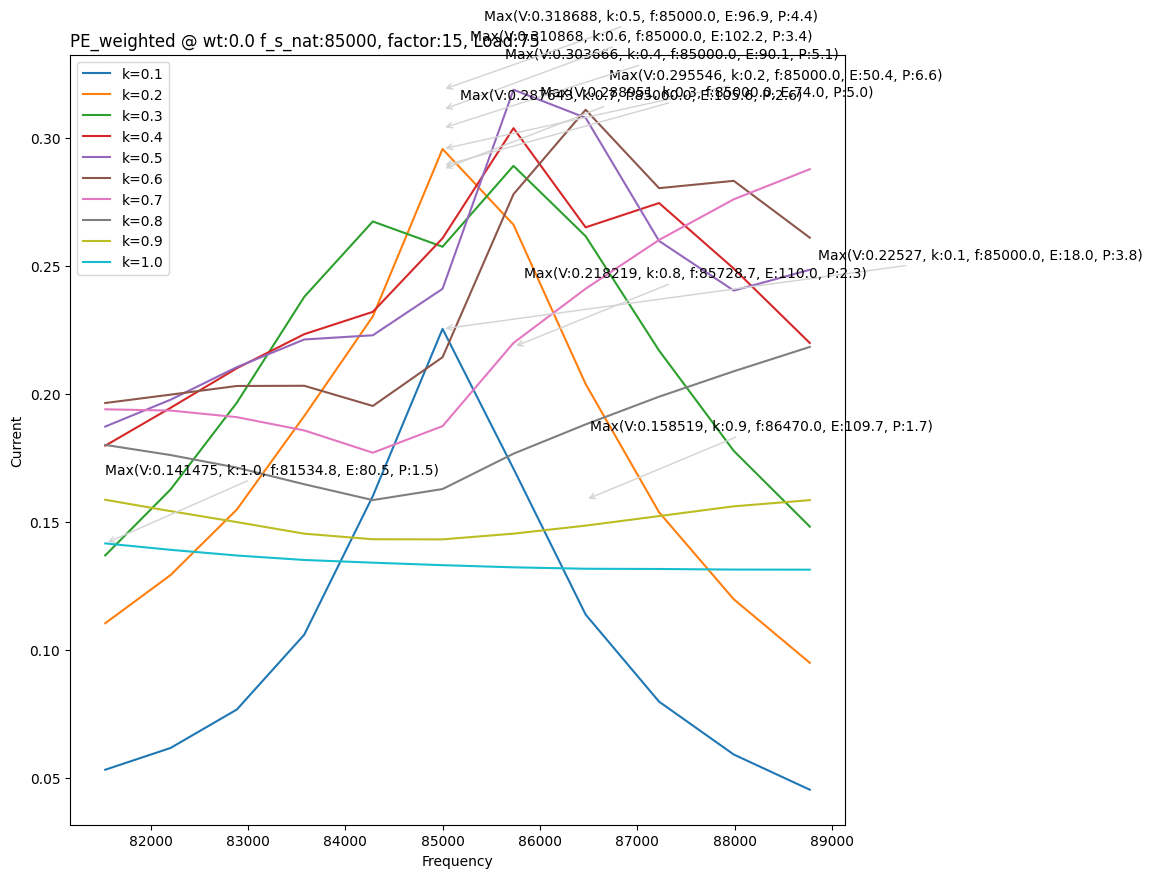

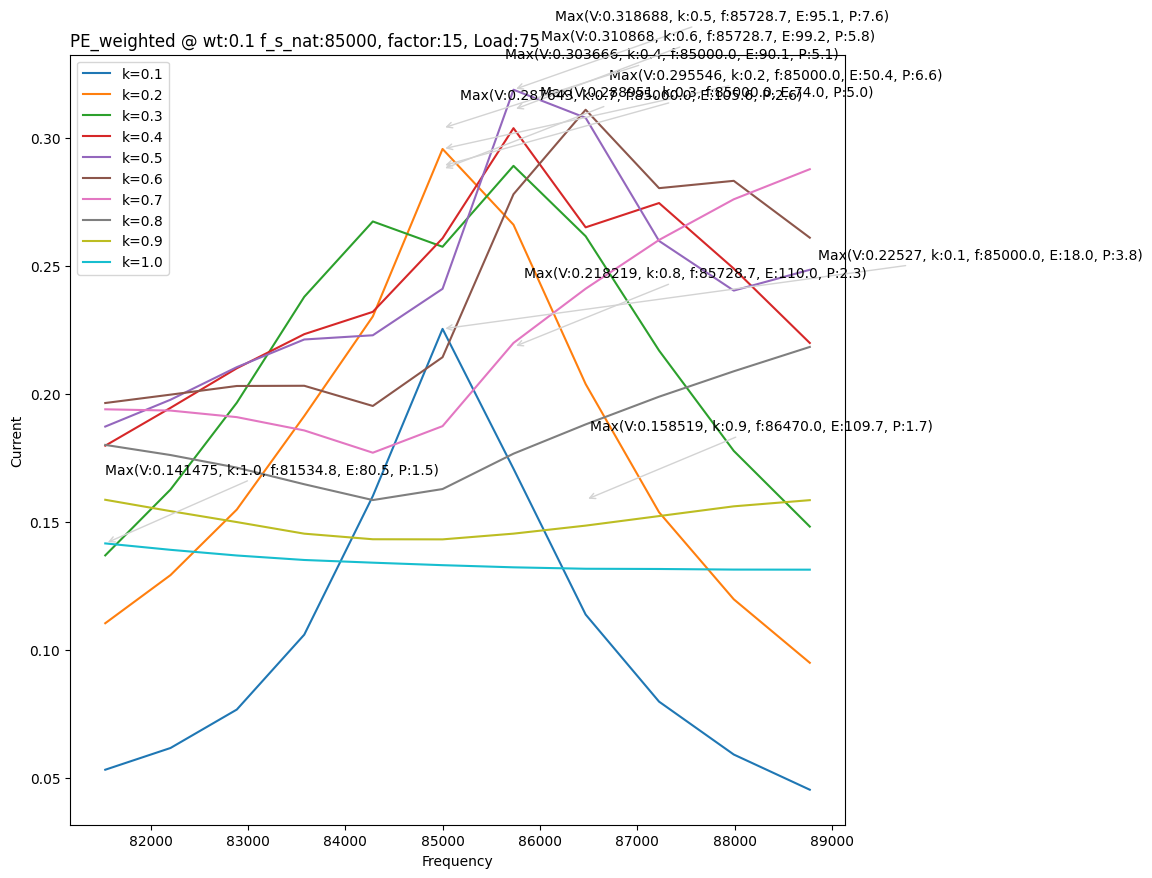

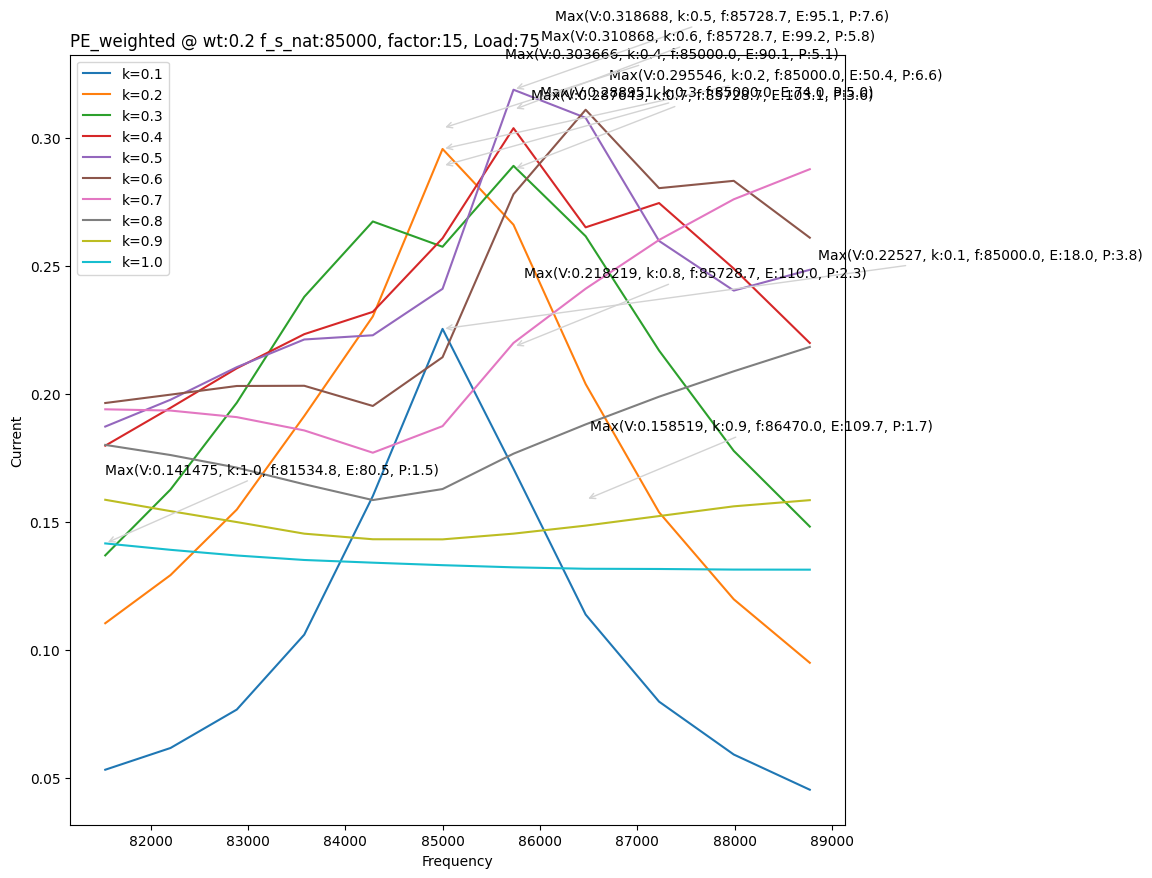

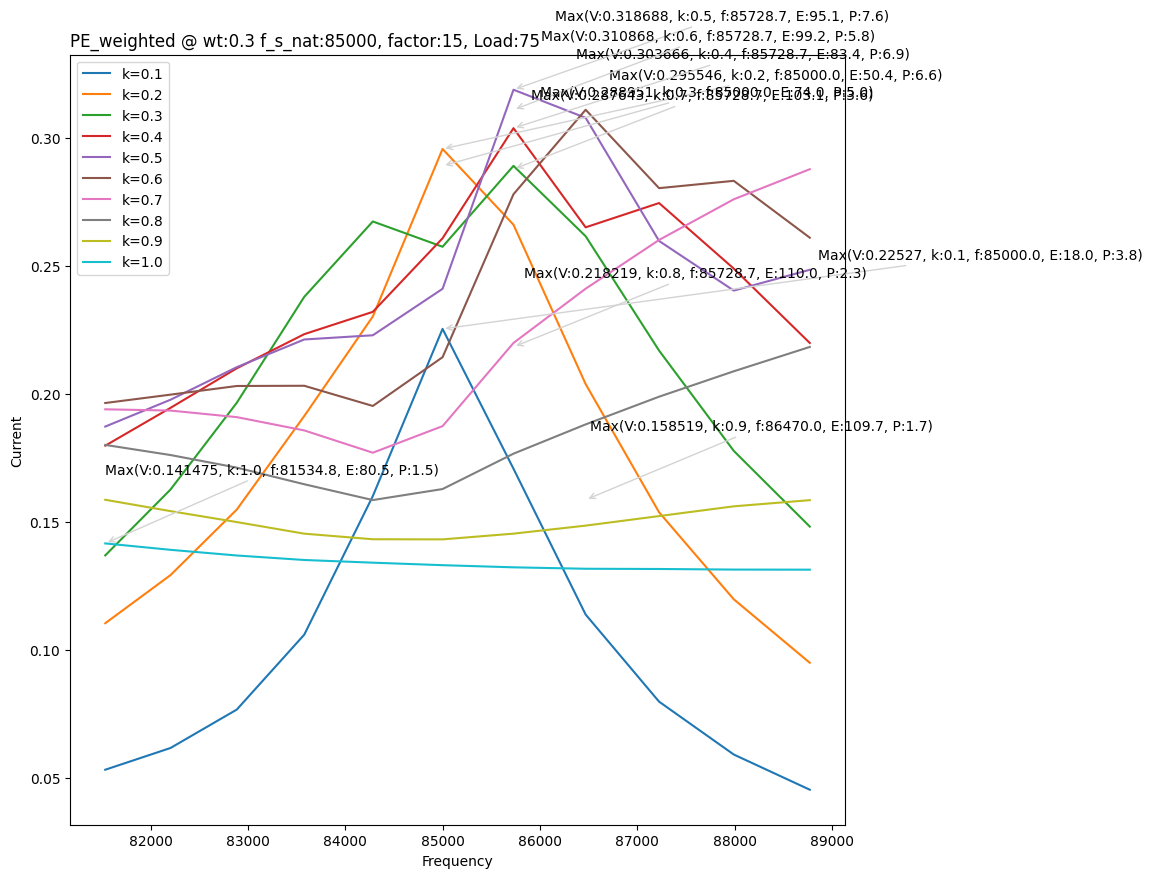

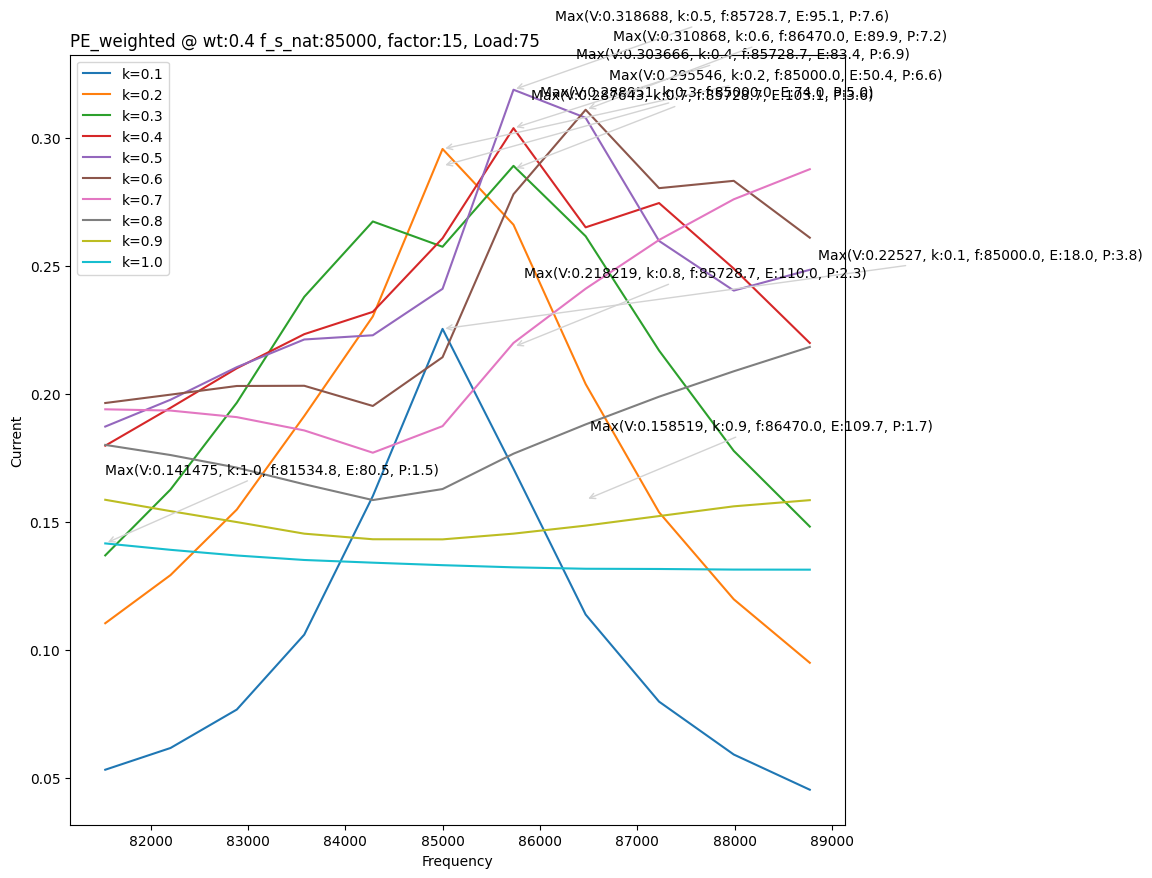

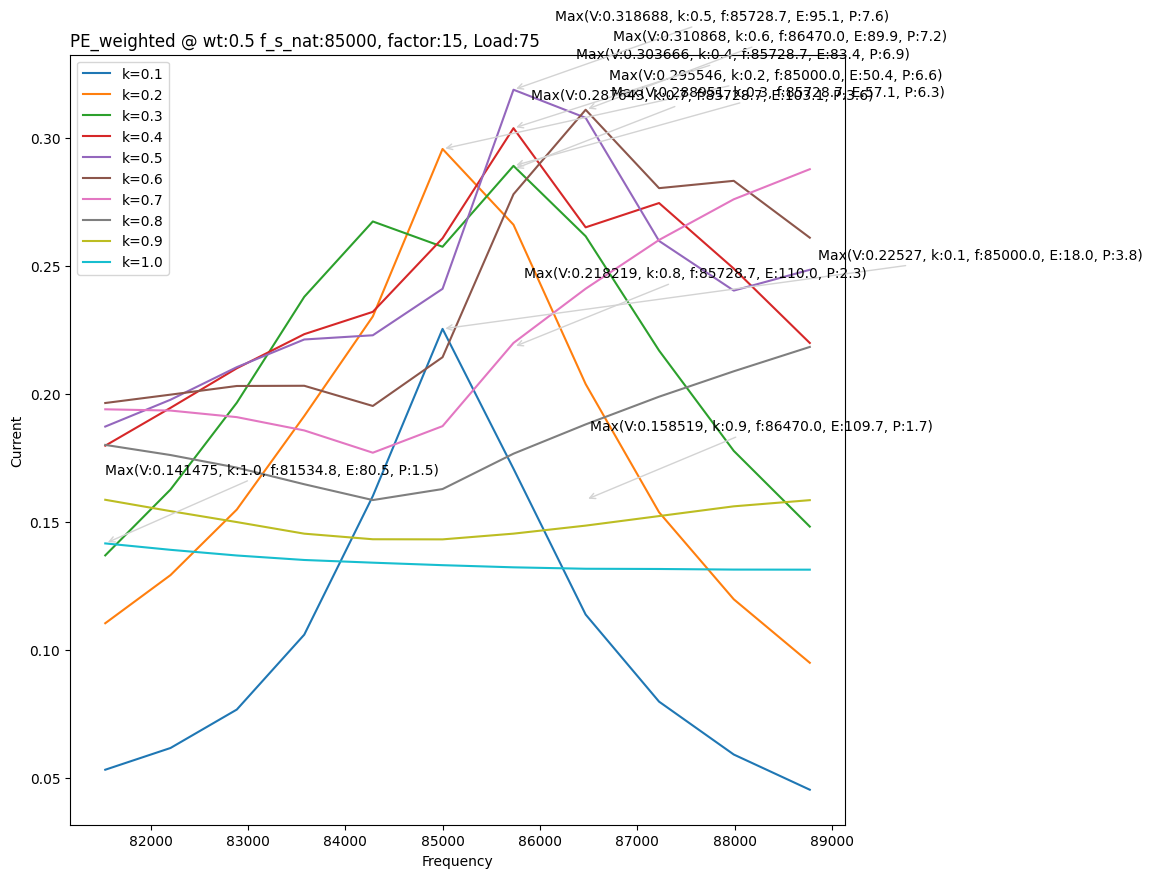

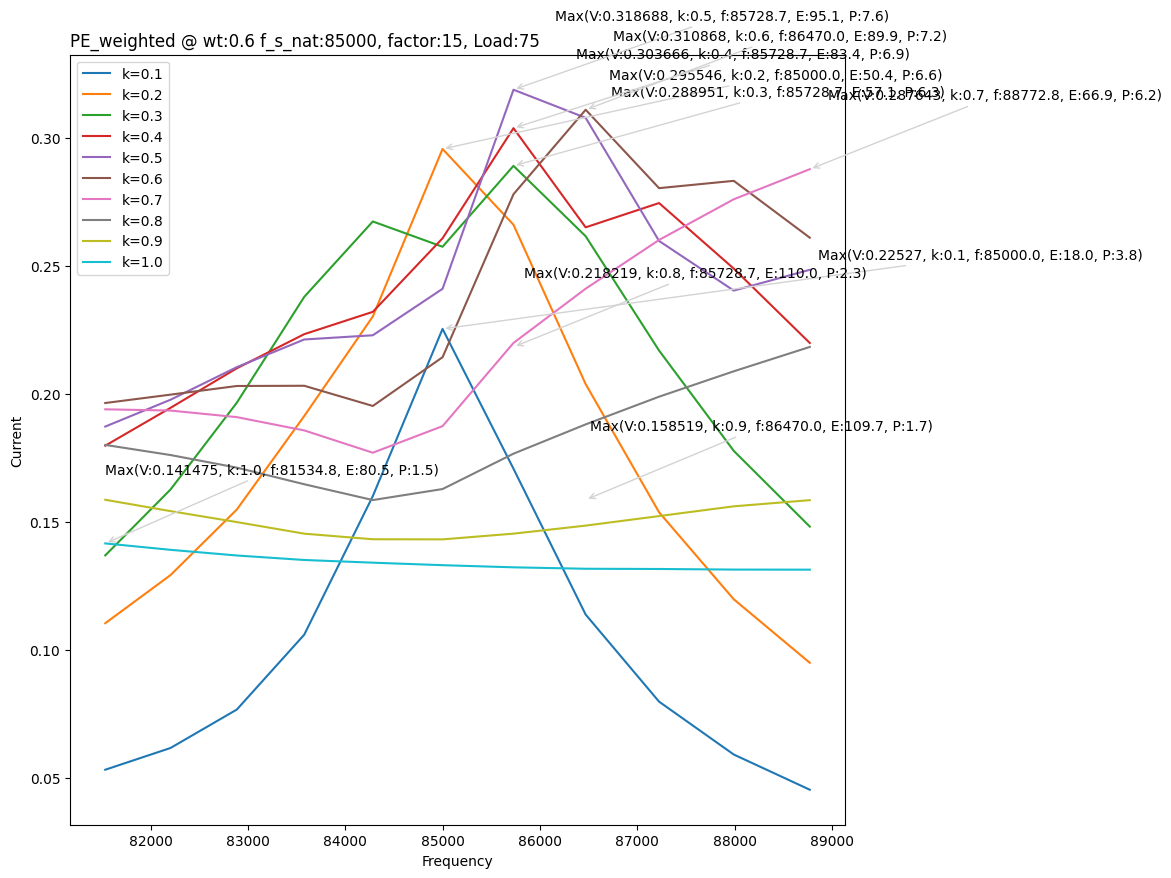

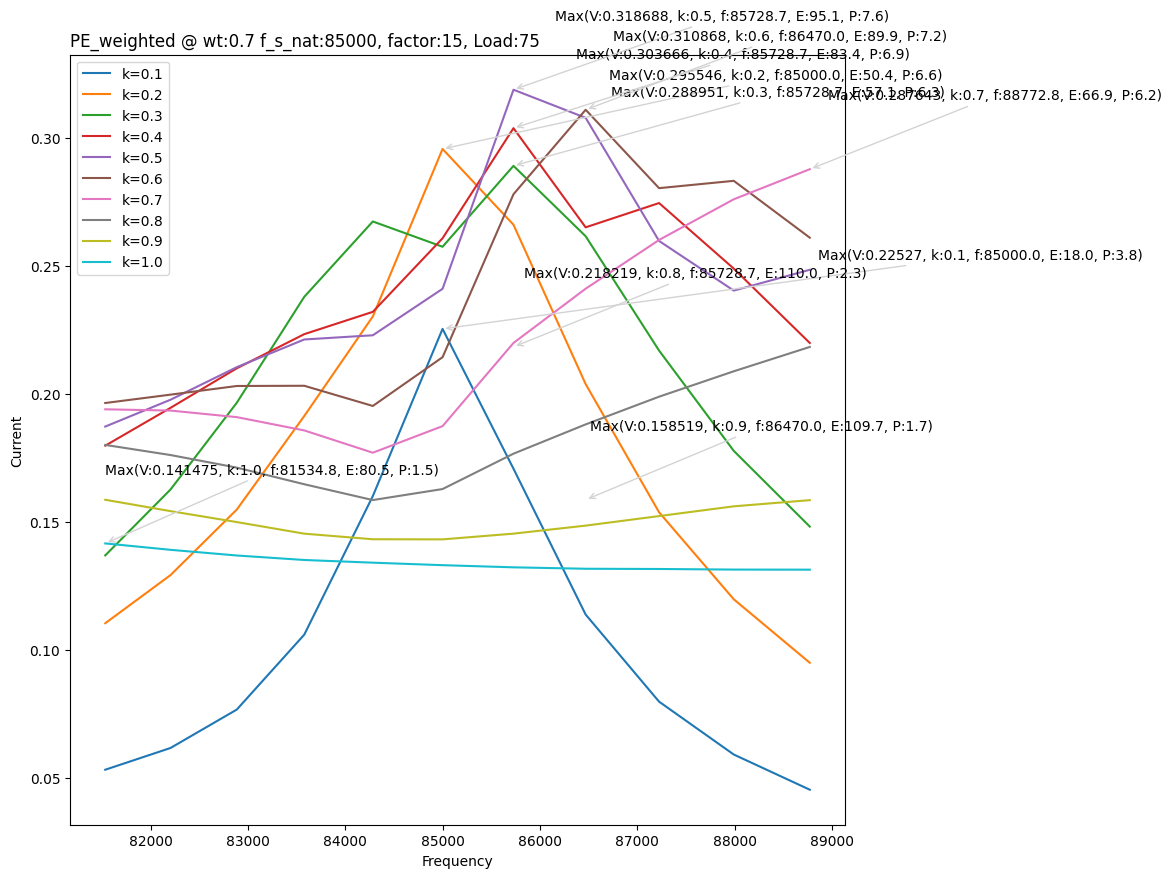

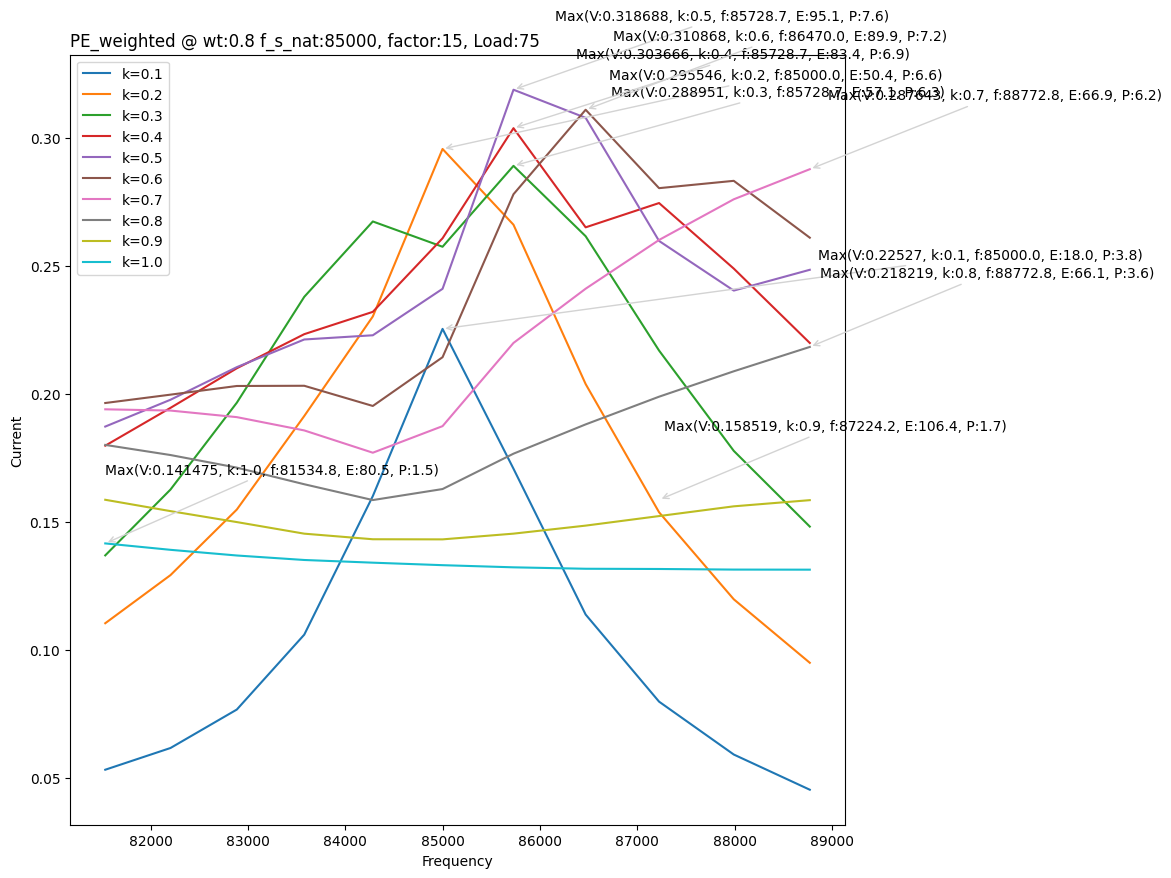

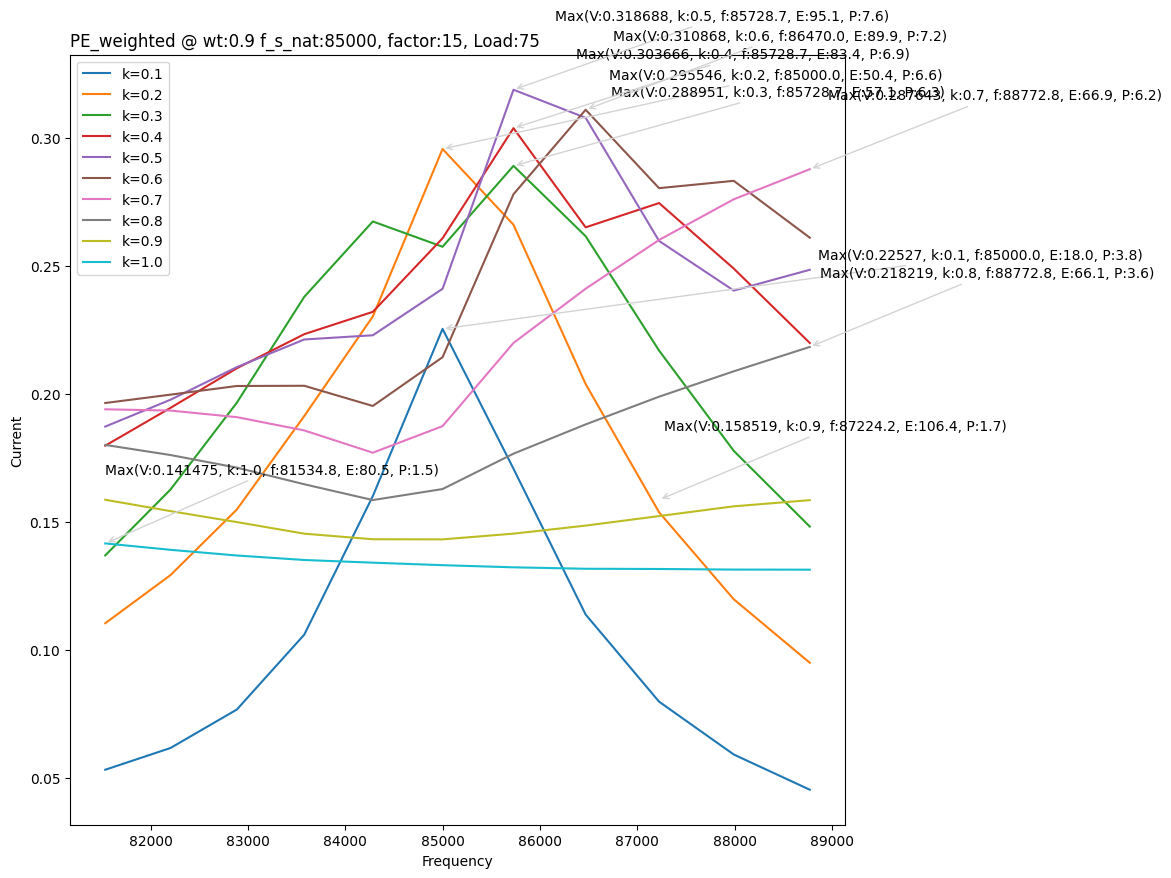

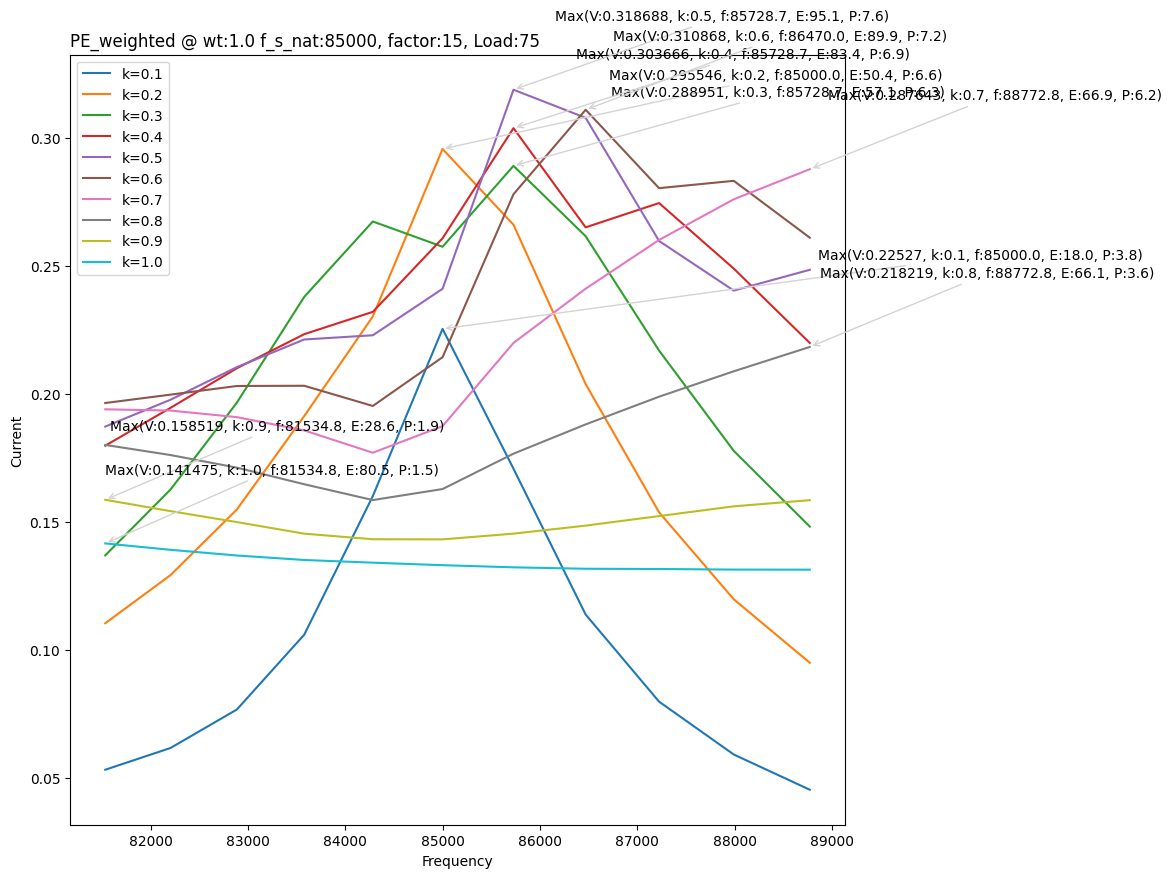

In [ ]:
# Plot {Efficiency, Power, V & I} vs Frequency from a single f_s_nat @ 85kHz & R_load = 75 ohms
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# function
def plot_CurrentPerK_forFactorLoadWeight(weight, df, k, f, factor, r_load):
  df_kf = df.sort_values(by='Frequency')
  # Get Voltage, Power, Efficiency & Frequency corresponding to MAX weighted PE function
  maxI = df_kf['I_out'].max()
  maxEfficiency = df_kf['Efficiency'][df_kf['PE_sum'].idxmax()]
  maxPower = df_kf['P_out'][df_kf['PE_sum'].idxmax()]
  maxFrequency = df_kf['Frequency'][df_kf['PE_sum'].idxmax()]

  # Draw a line chart with a different color for each 'k' value in the subplot
  # marker='o' => each data point is marked in the chart with a solid circle
  axs.plot(df_kf['Frequency'], df_kf['I_out'], label=f'k={k}')
  axs.set_title(f'PE_weighted @ wt:{weight:.1f} f_s_nat:{f}, factor:{factor}, Load:{r_load}', loc='left')
  axs.legend()

  # Set X and Y axis titles
  axs.set_xlabel('Frequency')
  axs.set_ylabel(f'Current')
  axs.annotate(f"Max(V:{maxI}, k:{k}, f:{maxFrequency:.1f}, E:{maxEfficiency:.1f}, P:{maxPower:.1f})",
              xy=(maxFrequency, maxI), xytext=((30/k)-30,50),
              textcoords="offset points",
              arrowprops=dict(arrowstyle="->", color='lightgray'))

  # end function

# Loop over all files
for filePath in filePaths:
  # Read the Excel file
  df = pd.read_excel(filePath, sheet_name='EfficiencyConfigurations')
  maxAbsolutePower = df['P_out'].max()  # max power across all K values specific to the target load

  # Get unique 'f_s_nat' values
  f_value = sorted(df['f_s_nat'].unique())[0]
  for Power_weight in np.arange(0, 1.1, 0.1):
    df['PE_sum'] = df['Efficiency']*(1-Power_weight) + (df['P_out']/maxAbsolutePower)*100*Power_weight
    fig, axs = plt.subplots(1,1,figsize=(10, 10))
    # Get unique 'k' values within the current 'R_load' value
    k_values = np.sort(df['k'].unique())
    # For each unique 'k' value within the current 'R_load' value
    for k in k_values:
        # Filter rows with the current 'k' value
        df_k = df[df['k'] == k]
        plot_CurrentPerK_forFactorLoadWeight(Power_weight, df_k, k, f=85000, factor=15, r_load=75)

    # Adjust the vertical spacing between the rows
    plt.subplots_adjust(hspace=0.75)




